In [1]:
from datasets import load_dataset_builder
ds_builder = load_dataset_builder("rotten_tomatoes")


/Users/shinya/demo-embedding/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
ds_builder.info.description

''

In [3]:
ds_builder.info.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['neg', 'pos'], id=None)}

In [4]:
from datasets import load_dataset
dataset = load_dataset("rotten_tomatoes", split="train")

In [5]:
dataset.to_pandas()

,text,label
0,the rock is destined to be the 21st century's ...,1
1,"the gorgeously elaborate continuation of "" the...",1
2,effective but too-tepid biopic,1
3,if you sometimes like to go to the movies to h...,1
4,"emerges as something rare , an issue movie tha...",1
...,...,...
8525,any enjoyment will be hinge from a personal th...,0
8526,if legendary shlockmeister ed wood had ever ma...,0
8527,hardly a nuanced portrait of a young woman's b...,0
8528,"interminably bleak , to say nothing of boring .",0


In [6]:
dataset[0]['text']

'the rock is destined to be the 21st century\'s new " conan " and that he\'s going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal .'

In [7]:
from transformers import AutoTokenizer
from datasets import load_dataset

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
dataset = load_dataset("rotten_tomatoes", split="train")

/Users/shinya/demo-embedding/.venv/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [8]:
tokenizer(dataset[0]["text"])

{'input_ids': [101, 1996, 2600, 2003, 16036, 2000, 2022, 1996, 7398, 2301, 1005, 1055, 2047, 1000, 16608, 1000, 1998, 2008, 2002, 1005, 1055, 2183, 2000, 2191, 1037, 17624, 2130, 3618, 2084, 7779, 29058, 8625, 13327, 1010, 3744, 1011, 18856, 19513, 3158, 5477, 4168, 2030, 7112, 16562, 2140, 1012, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [10]:
from transformers import AutoFeatureExtractor
from datasets import load_dataset, Audio

feature_extractor = AutoFeatureExtractor.from_pretrained("facebook/wav2vec2-base-960h")
dataset = load_dataset("PolyAI/minds14", "en-US", split="train", trust_remote_code=True)

Generating train split: 563 examples [00:00, 1009.20 examples/s]


In [11]:
dataset[0]

{'path': '/Users/shinya/.cache/huggingface/datasets/downloads/extracted/7cbca52ea1ed4473abc21acb4e1fabb81a8b463c0f44a19ba02667d05bcfd904/en-US~JOINT_ACCOUNT/602ba55abb1e6d0fbce92065.wav',
 'audio': {'path': '/Users/shinya/.cache/huggingface/datasets/downloads/extracted/7cbca52ea1ed4473abc21acb4e1fabb81a8b463c0f44a19ba02667d05bcfd904/en-US~JOINT_ACCOUNT/602ba55abb1e6d0fbce92065.wav',
  'array': array([ 0.        ,  0.00024414, -0.00024414, ..., -0.00024414,
          0.        ,  0.        ]),
  'sampling_rate': 8000},
 'transcription': 'I would like to set up a joint account with my partner',
 'english_transcription': 'I would like to set up a joint account with my partner',
 'intent_class': 11,
 'lang_id': 4}

## Image

In [12]:
from transformers import AutoFeatureExtractor
from datasets import load_dataset, Image

feature_extractor = AutoFeatureExtractor.from_pretrained("google/vit-base-patch16-224-in21k")
dataset = load_dataset("beans", split="train")

/Users/shinya/demo-embedding/.venv/lib/python3.10/site-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(
Generating test split: 100%|██████████| 128/128 [00:00<00:00, 7280.30 examples/s]


In [13]:
dataset[0]

{'image_file_path': '/home/albert/.cache/huggingface/datasets/downloads/extracted/967f0d9f61a7a8de58892c6fab6f02317c06faf3e19fba6a07b0885a9a7142c7/train/angular_leaf_spot/angular_leaf_spot_train.0.jpg',
 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x500>,
 'labels': 0}

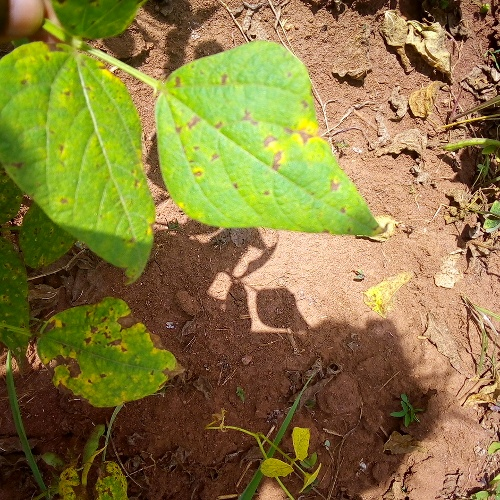

In [16]:
display(dataset[0]["image"])

In [24]:
from torchvision.transforms import RandomRotation

rotate = RandomRotation(degrees=(0, 90))

def transforms(examples):
    examples["pixel_transformed"] = [rotate(img) for img in examples["image"]]
    return examples

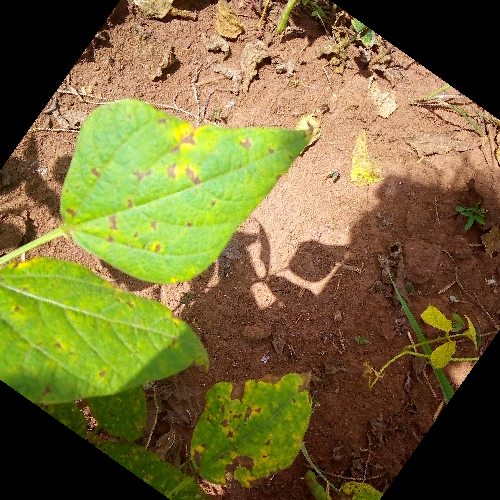

In [25]:
dataset.set_transform(transforms)
dataset[0]["pixel_transformed"]